# Extreme Value Distributions

## Preliminaries

### Imports

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
from scipy.optimize import brentq
from scipy.stats import gumbel_r

%matplotlib inline

### Random Seed

In [2]:
seed=94324
random.seed(seed)

## Distribution of the Max of C Gaussians

In [3]:
mu0=0.0
sigma0=1

In [4]:
R=10000

In [5]:
C=1000

In [6]:
draws=random.normal(mu0,sigma0,(R,C))
max_draw=draws.max(axis=1)
max_draw.shape

(10000,)

In [16]:
class MaxGaussian:
    def __init__(self,C,mu,sigma):
        self.mu=mu
        self.sigma=sigma
        f=np.sqrt(2*np.log(C))   
        b=f-(1/2*np.log(np.log(C))+np.log(2*np.sqrt(np.pi)))/f
        self.gumbel=gumbel_r(loc=b,scale=1/b)
    def pdf(self,k):
        z=(k-self.mu)/self.sigma
        return self.gumbel.pdf(z)/self.sigma
    def rvs(self,size=1):
        z=self.gumbel.rvs(size)
        return self.mu+z*self.sigma 

In [17]:
z=np.linspace(0,mu0+5*sigma0,101)
gEV=MaxGaussian(C,mu0,sigma0)
ev_dist=gEV.pdf(z)
ev_sample=gEV.rvs(R)
ev_sample[:]

3.11646988529


array([ 3.73244135,  3.40401155,  3.2896224 , ...,  3.00687945,
        2.72370255,  3.42356792])

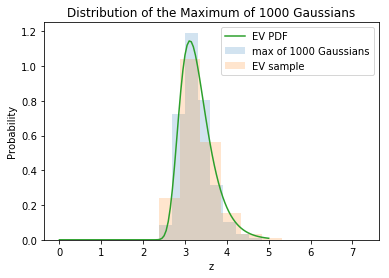

In [9]:
plt.hist(max_draw,alpha=0.2,normed=True,label="max of {0} Gaussians".format(C))
plt.hist(ev_sample,alpha=0.2,normed=True,label="EV sample")
plt.plot(z,ev_dist,label="EV PDF")
plt.legend()
plt.title("Distribution of the Maximum of {0} Gaussians".format(C))
plt.xlabel("z")
plt.ylabel("Probability")

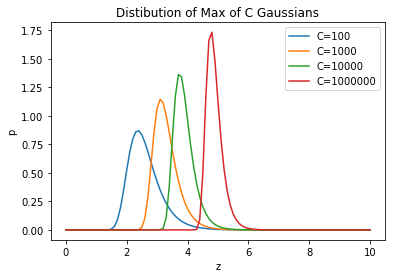

In [10]:
z=np.linspace(0,mu0+10*sigma0,101)
Cs=[100,1000,10000,1000000]
for C in Cs:
    gEV=MaxGaussian(C,mu0,sigma0)
    ev_dist=gEV.pdf(z)
    plt.plot(z,ev_dist,label="C={0}".format(C))
plt.xlabel("z")
plt.ylabel("p")
plt.title("Distibution of Max of C Gaussians")
plt.legend()

## Distribution of the best of C Coins

We now assume we have **$C$ fair Coins**
If we  toss each coin $N$ times, what is the distribution of the coin with most Heads?


If $N$ is larger than 10 or so, we  can approximate the binomial distribution by a Gaussian with

$$
    \mu_{p,N}=pN
$$
and stardard deviation

$$
    \sigma_{p,N}=\sqrt{p(1-p)N}
$$

were $p=\frac{1}{2}$ for a fair coin toss, but we can leave it more general
 

Lets call $B_M(C,N,p)$ to the maximum of $C$ binomial distributions with parameters $N,p$
$$
   P(B_M(C,N,p)>=k) \approx P( G_M(C,\mu_{p,N},\sigma_{p,N})>= k)
$$

In [11]:
class MaxBinomial:
    def __init__(self,C,N,p):
        self.mu=p*N
        self.sigma=np.sqrt(p*(1-p)*N)
        f=np.sqrt(2*np.log(C))
        
        b=f-(1/2*np.log(np.log(C))+np.log(2*np.sqrt(np.pi)))/f
        self.gumbel=gumbel_r(loc=b,scale=1/b)
    def pdf(self,k):
        z=(k-self.mu)/self.sigma
        return self.gumbel.pdf(z)/self.sigma
    def rvs(self,size=1):
        z=self.gumbel.rvs(size)
        return self.mu+z*self.sigma # this will return doubles, but we do not care

In [12]:
C=1000
N=100
p0=0.5

In [13]:
max_coin=random.binomial(N,p0,(R,C)).max(axis=1)
max_coin.shape

(10000,)

In [14]:
binEV=MaxBinomial(C,N,p0)
ev_dist=binEV.pdf(np.arange(0,N+1))
ev_sample=binEV.rvs(R)
ev_sample[:10]

array([ 66.49743651,  65.1941664 ,  65.97177289,  66.32043028,
        64.78801754,  66.11587204,  69.78822367,  64.94197551,
        70.1539939 ,  64.81201476])

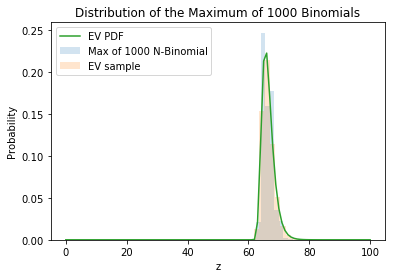

In [15]:
plt.hist(max_coin,alpha=0.2,normed=True,label="Max of {0} N-Binomial".format(C))
plt.hist(ev_sample,alpha=0.2,normed=True,label="EV sample")
plt.plot(np.arange(0,N+1),ev_dist,label="EV PDF")
plt.legend()
plt.title("Distribution of the Maximum of {0} Binomials".format(C))
plt.xlabel("z")
plt.ylabel("Probability")